# Metropolis-Hastings Random Walk (MHRW)

#### Matheus Victal Cerqueira, _Universidade de São Paulo_, [_Instituto de Ciências Matemáticas e de Computação_](https://www.icmc.usp.br/). 

## MHRW

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random as rd
import math
from scipy.stats import entropy
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn')


In [8]:
def visualize(G, sample = 0):
    if sample == 0:
        pos=nx.spring_layout(G)
        plt.figure(figsize=(15,10))
        nx.draw_networkx(G, node_size=75, with_labels = False ,font_size=16, pos=pos,node_color='crimson',edge_color ='k') 
        plt.show(True)
        
    else:
        pos=nx.spring_layout(G)
        plt.figure(figsize=(15,10))
        nx.draw_networkx(G, node_size=75, with_labels = False ,font_size=16, 
                         pos=pos,node_color='crimson',edge_color ='crimson') 
        nx.draw_networkx(sample, node_size=150, with_labels = False ,font_size=16, 
                         pos=pos,node_color='k',edge_color ='k',width = 2)
        plt.show(True)
        
    return

In [12]:
# MHRW function receives G, n and tol
def MHRW(G, n, tol):
    import random as rd

    sampled_node = rd.sample(G.nodes,1) # sampling the node that will start the random walk (returns [node_label])
    
    # Auxiliar variables:
    # sampled_node is a list, not a number, we need a hashable variable for the method .neighbors
    current = sampled_node[0] 
    next_ = 0
    count = 0 # stores the number of sampled nodes
    edgelist = [] # stores sampled edges
    node_list = [] # stores sampled nodes
    node_list.append(current)
    control = 0
    
    # Random walk loop:
    while count<n:
        neighbors = list(G.neighbors(current)) # turn the current node neighbors iterators into a list
        next_ = rd.choice(neighbors) # uniform random choice from neighbors
        
        kc = G.degree[current]
        kn = G.degree[next_]
        
        u = rd.uniform(0,1)
        
        if u <= min(1,kc/kn):
            edgelist.append((current,next_)) # sampled edge
            node_list.append(next_) # sampled node
            current = next_
            
            count = len(Counter(node_list).keys()) # sample size verification
        
        control = control + 1
        
        if control > tol:
            print("Error")
            break
        
    sampled_graph = nx.Graph(edgelist) # builds a nx.Graph object to store the sampled subgraph, mantaining the original labels
    
    return sampled_graph

In [15]:
G = nx.barabasi_albert_graph(1000,4, seed = 2112)

In [17]:
for _ in range(100):
    sample = MHRW(G,800, tol = 100000)
    print(len(sample))

800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800


In [18]:
# sample statistical moments
def moments(l, m):
    M = 0
    N = len(l)
    for i in l:
        M = M + i**m 
    M = M/N 
    return M


# sample shannon entropy
def shannon(vector, bin_s): # function to compute Shannon's Entropy, receives a vector of continuous values and the size of 
    # bins to be considered (vector must be a list)
        
    p_vector = pd.cut(vector, bins = np.arange(0,max(vector)+bin_s,bin_s),include_lowest=True).value_counts() #here,
    # the count of occurence for the specified bin is made
    #print(p_vector)
    p_vector = p_vector.values
    p_vector = p_vector/len(vector) # obtain frequencies of occurence
    #print(p_vector,sum(p_vector))
    H = 0
    
    for p in p_vector:
        if(p > 0):
            H = H - p*math.log(p,10) #acumulates the values of the product of P(k) and log(P(k))
    return H

In [19]:
def total_metrics(G):
    
    # getting the largest connected component of the graph
    if nx.is_connected(G) == False:
        largest_cc = max(nx.connected_components(G), key=len)
        S = G.subgraph(largest_cc).copy()
    else:
        S = G
    
    
    metrics_list = [] # order: assortativity, transitivity, av. shortest path, (first, second, third, fourth moments and 
    # entropy of:) degree, local clustering, betweennes, eigenvector, closeness, communicability, k-core.
    
    # Global metrics
    
    # degree assortativity coefficient
    metrics_list.append(nx.degree_assortativity_coefficient(S))
    
    # transitivity
    metrics_list.append(nx.transitivity(S))
    
    #av. shortest path
    metrics_list.append(nx.average_shortest_path_length(S))
    
    # Complexity coefficient
    
    # <k^2>/<k>
    
    degree_list = dict(S.degree).values()
    complexity_coef = moments(degree_list,2)/moments(degree_list,1)
    
    metrics_list.append(complexity_coef)
    
    
    
    # Local Metrics
    
    # Degree
    
    degree_list = dict(S.degree).values()
    
    for m in range(1,5):
        result = moments(degree_list, m)
        metrics_list.append(result)
        
    metrics_list.append(shannon(list(degree_list),1))    
        
    
    # Local clustering
    
    clustering_list = nx.clustering(S).values()
    
    for m in range(1,5):
        result = moments(clustering_list, m)
        metrics_list.append(result)    
        
    metrics_list.append(shannon(list(clustering_list),0.1))  
        
    
    # Betweenness 
    
    bet_list = nx.betweenness_centrality(S).values()
    
    for m in range(1,5):
        result = moments(bet_list, m)
        metrics_list.append(result) 
        
    metrics_list.append(shannon(list(bet_list),0.1))  
        
    # Closeness
    
    clos_list = nx.closeness_centrality(S).values()
    
    for m in range(1,5):
        result = moments(clos_list, m)
        metrics_list.append(result)
        
    metrics_list.append(shannon(list(clos_list),0.1))  
        
    
    # Communicability
    
    com_list = nx.communicability_betweenness_centrality(S).values()
    
    for m in range(1,5):
        result = moments(com_list, m)
        metrics_list.append(result)
    
    metrics_list.append(shannon(list(com_list),0.1))  
        
        
    # K-core
    
    core_list = nx.core_number(S).values()
    
    for m in range(1,5):
        result = moments(core_list, m)
        metrics_list.append(result)  
        
    metrics_list.append(shannon(list(core_list),1))  
    
    
    #PageRank
    
    pr_list = nx.pagerank(S).values()
    
    for m in range(1,5):
        result = moments(pr_list, m)
        metrics_list.append(result)  
        
    metrics_list.append(shannon(list(pr_list),0.1))  
    
    
    #Eigenvector centrality
    
    eig_list = nx.eigenvector_centrality(S, max_iter = 2000).values()
    
    for m in range(1,5):
        result = moments(eig_list, m)
        metrics_list.append(result)  
        
    metrics_list.append(shannon(list(eig_list),0.1))  
    
        
    # Size of the largest connected component of the graph
    metrics_list.append(len(S))
        
    return metrics_list

In [40]:
G = nx.barabasi_albert_graph(300,1, seed = 2112)

In [41]:
sample = MHRW(G,100, tol = 100000)

In [42]:
total_metrics(sample)

[-0.2256909984956329,
 0,
 4.73959595959596,
 5.252525252525253,
 1.98,
 10.4,
 144.6,
 2928.92,
 0.5104581887531483,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0.038159142444856756,
 0.01417938211559555,
 0.008395386919803792,
 0.0057933426454428085,
 0.15726965801828105,
 0.21970533785530844,
 0.05025912745796038,
 0.011962108313348634,
 0.002958881426009966,
 0.3467221811694578,
 0.045133818193314273,
 0.014987945632857342,
 0.008772630381716252,
 0.006057315594200684,
 0.20623324128780662,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.010000000000000007,
 0.00022148519843411817,
 1.235733836356885e-05,
 1.0557587869247759e-06,
 0.0,
 0.05198240215530383,
 0.009999999999999998,
 0.003947638769413373,
 0.002293235611879223,
 0.25738426758255223,
 100]

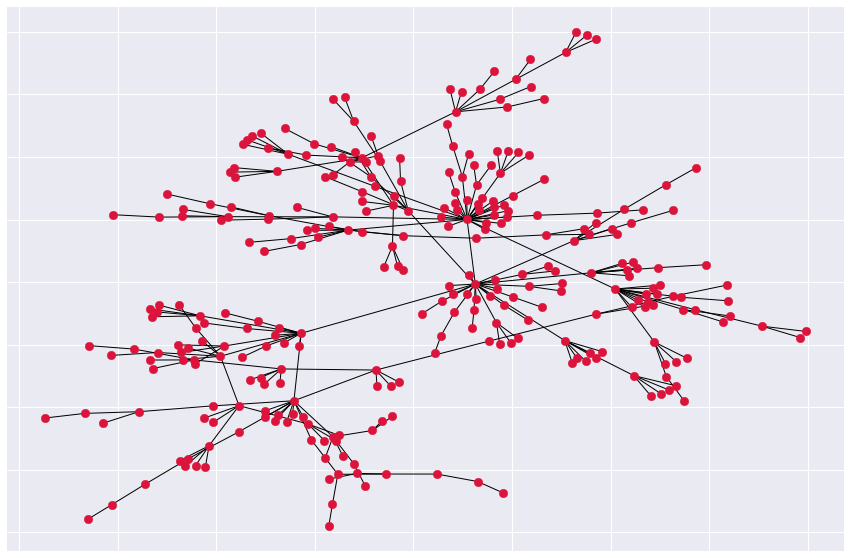

In [43]:
visualize(G)

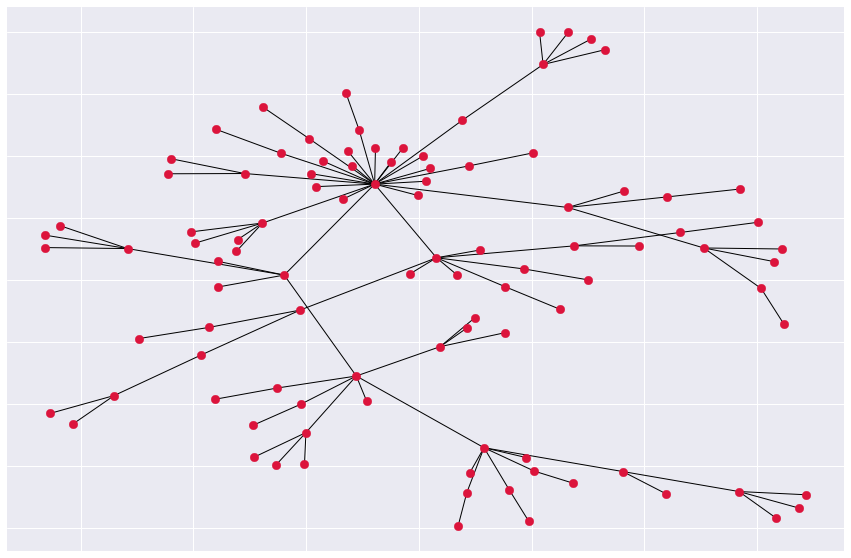

In [44]:
visualize(sample)

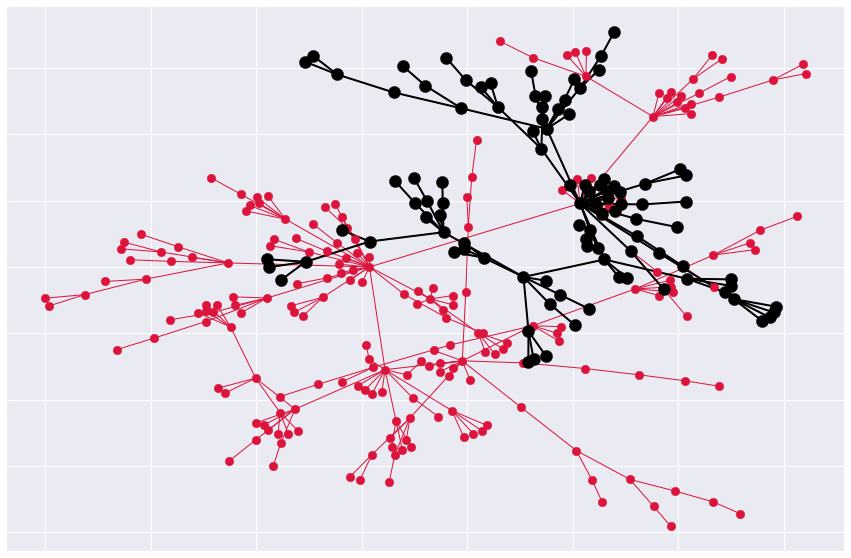

In [45]:
visualize(G, sample)